In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="darkgrid", palette="muted")

In [3]:
data = pd.read_csv('data.csv')
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
print(data.isnull().sum())

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


### Genre distribution chart

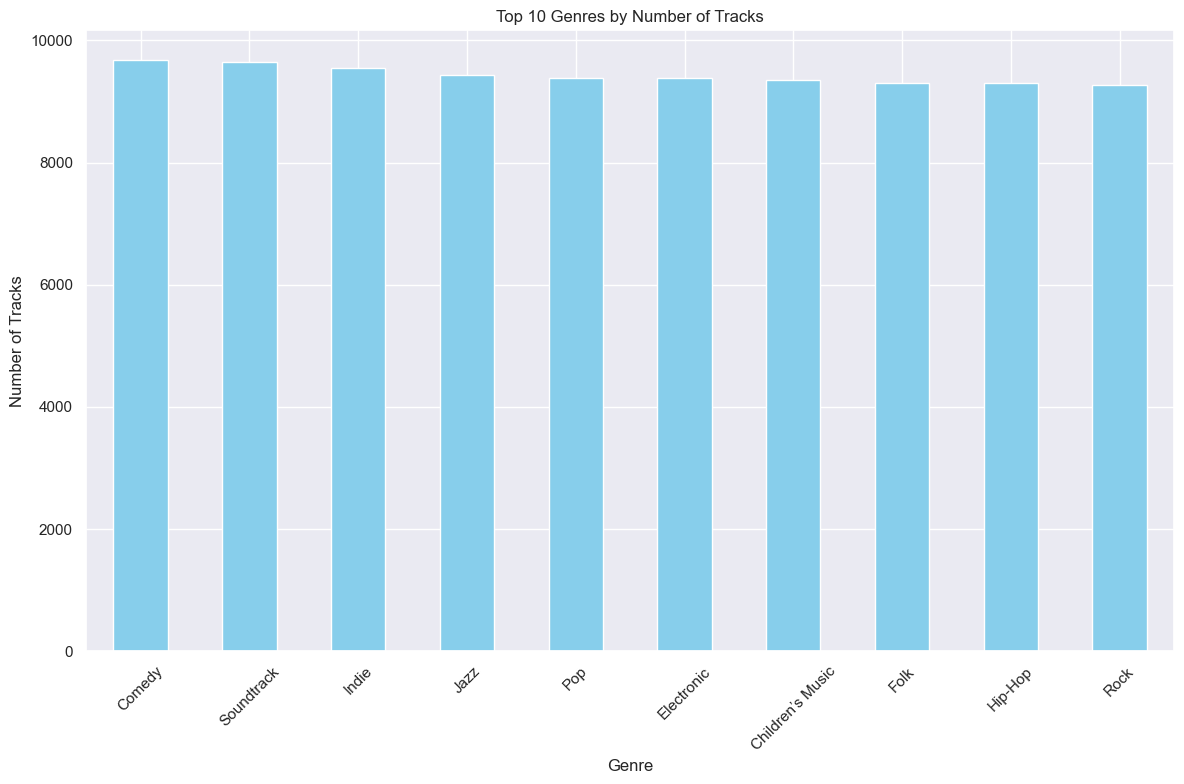

In [5]:
genre_counts = data['genre'].value_counts().head(10)

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres by Number of Tracks')
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Popularity Histogram

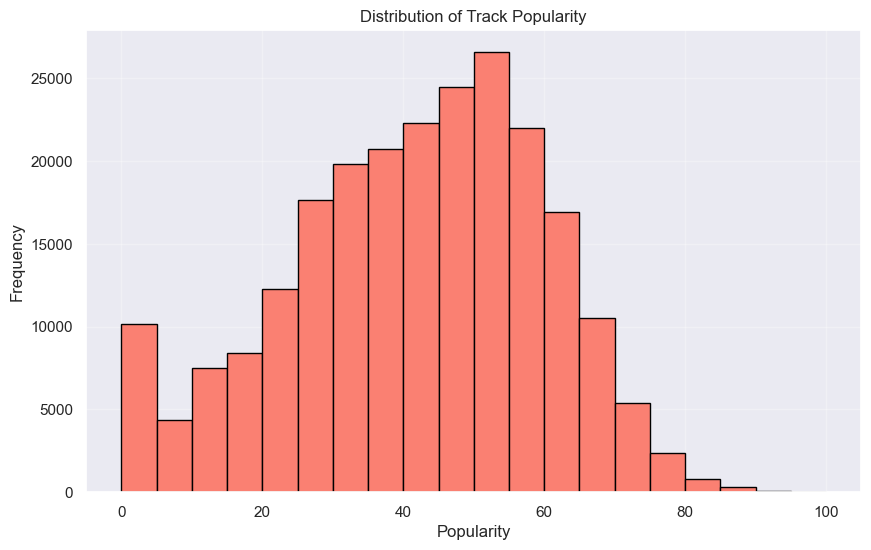

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(data['popularity'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

### Energy dispersion vs. danceability diagram

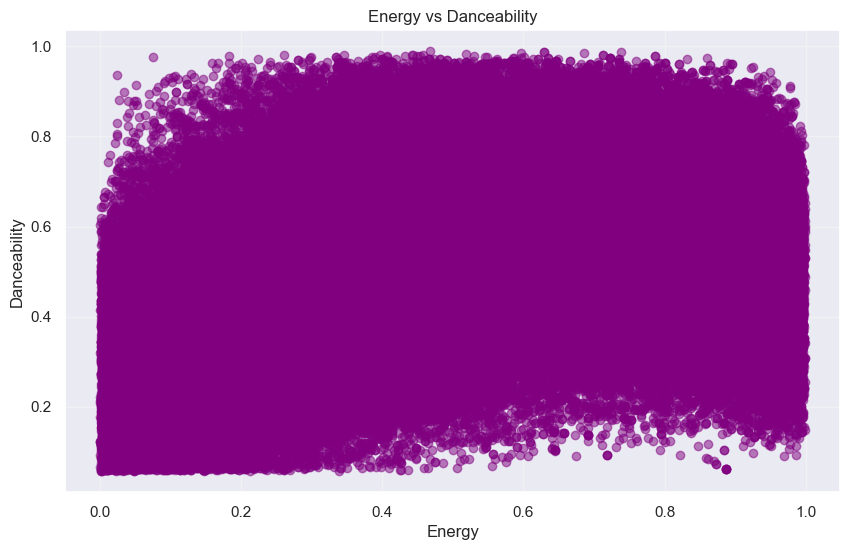

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['energy'], data['danceability'], alpha=0.5, color='purple')
plt.title('Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.grid(True, alpha=0.3)
plt.show()

### Boxplot for audio features of top genres

C:\Users\Aghabidareh\AppData\Local\Temp\ipykernel_19536\1384076999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='danceability', data=filtered_data, palette='Set2')


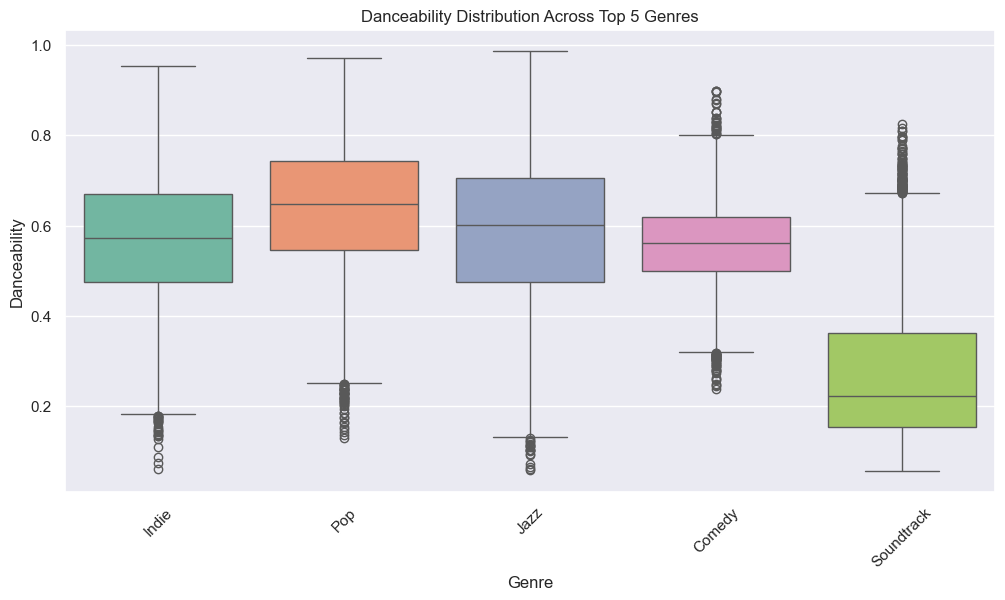

In [8]:
top_genres = data['genre'].value_counts().head(5).index
filtered_data = data[data['genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='danceability', data=filtered_data, palette='Set2')
plt.title('Danceability Distribution Across Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.xticks(rotation=45)
plt.show()

### Correlation matrix of audio features

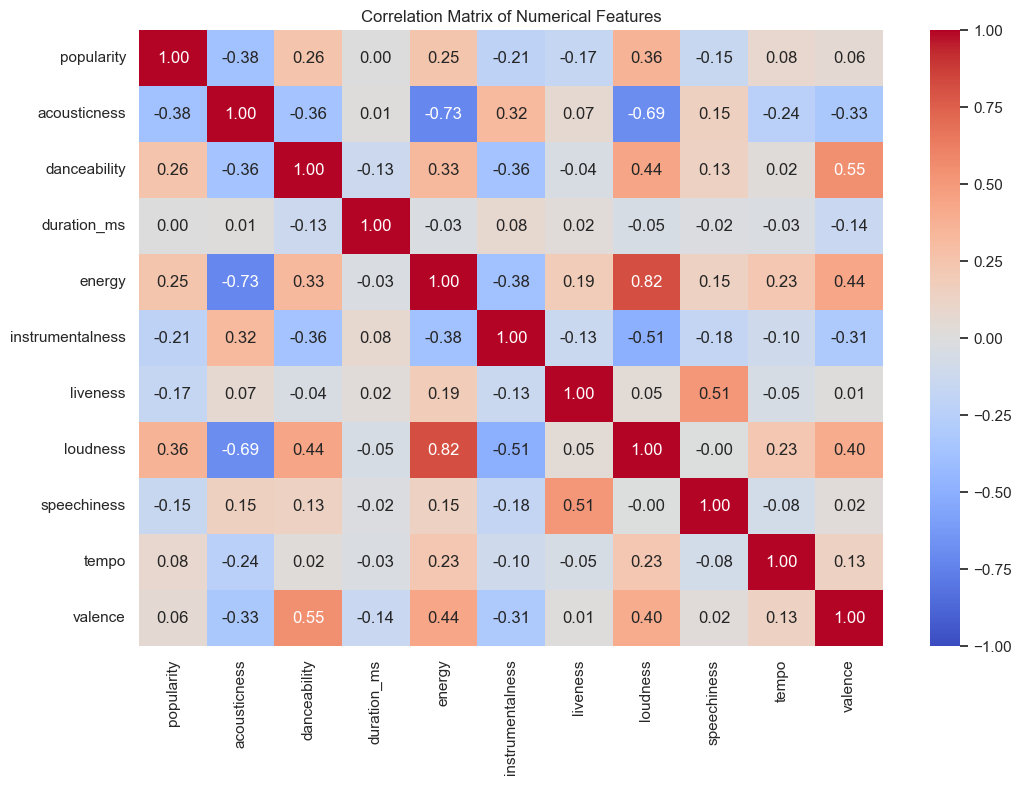

In [9]:
numerical_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms',
                  'energy', 'instrumentalness', 'liveness', 'loudness',
                  'speechiness', 'tempo', 'valence']
corr_matrix = data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Average popularity chart per genre

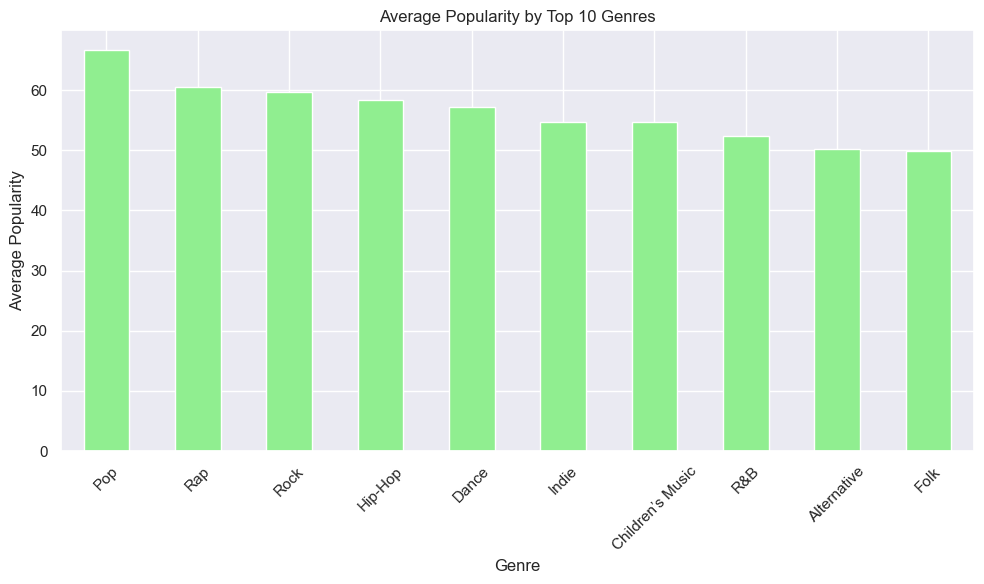

In [10]:
mean_popularity = data.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
mean_popularity.plot(kind='bar', color='lightgreen')
plt.title('Average Popularity by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Scatter chart of song duration vs. popularity

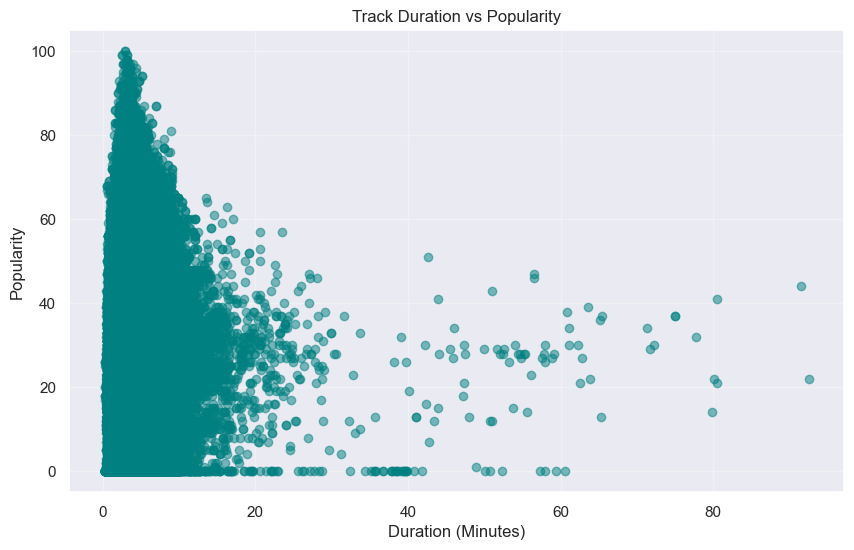

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(data['duration_ms'] / 60000, data['popularity'], alpha=0.5, color='teal')  # Convert ms to minutes
plt.title('Track Duration vs Popularity')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Popularity')
plt.grid(True, alpha=0.3)
plt.show()

### Energy histogram

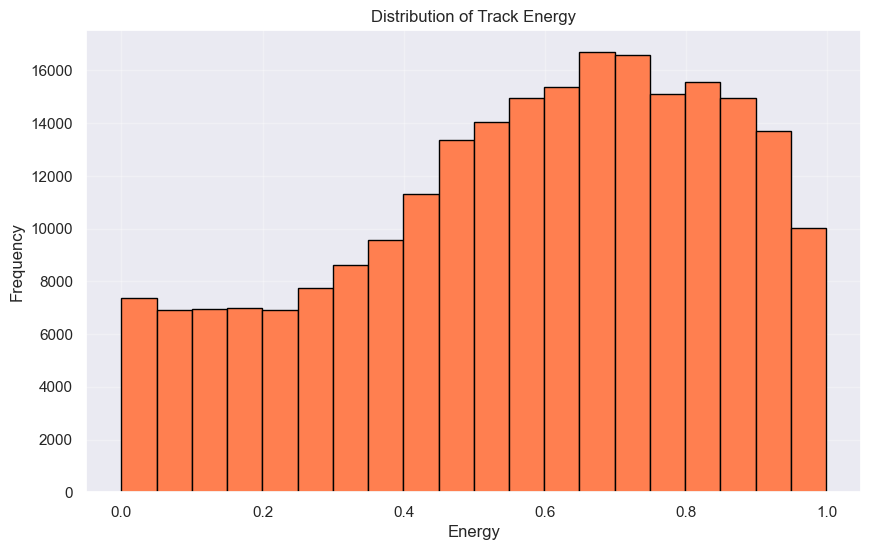

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(data['energy'], bins=20, color='coral', edgecolor='black')
plt.title('Distribution of Track Energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

### Boxplot for Valence in top genres

C:\Users\Aghabidareh\AppData\Local\Temp\ipykernel_19536\1588348646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='valence', data=filtered_data, palette='Set3')


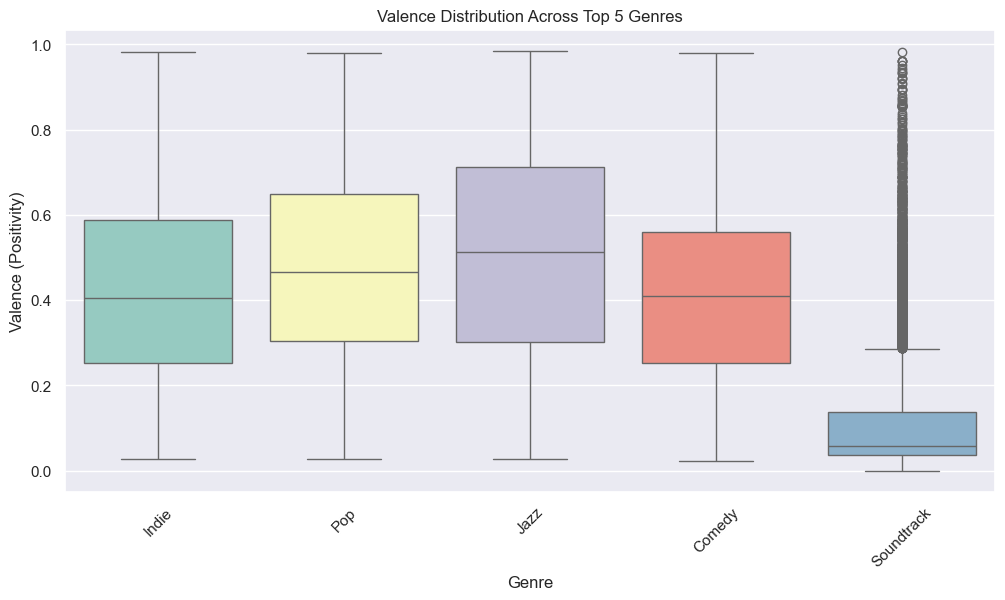

In [13]:
top_genres = data['genre'].value_counts().head(5).index
filtered_data = data[data['genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='valence', data=filtered_data, palette='Set3')
plt.title('Valence Distribution Across Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Valence (Positivity)')
plt.xticks(rotation=45)
plt.show()